## EDA

In [1]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/datasets/faces/labels.csv' 
data = pd.read_csv(file_path)

# Explorar el archivo
print("Primeras filas del archivo:")
print(data.head())  # Muestra las primeras filas

print("\nTamaño del conjunto de datos:")
print(data.shape)  # Número de filas y columnas

print("\nInformación del archivo:")
print(data.info())  # Revisión general de columnas y valores faltantes

print("\nEstadísticas descriptivas:")
print(data.describe())  # Estadísticas básicas para las columnas numéricas

Primeras filas del archivo:
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

Tamaño del conjunto de datos:
(7591, 2)

Información del archivo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None

Estadísticas descriptivas:
          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


Tamaño del conjunto de datos:
Hay 7591 filas y 2 columnas: file_name y real_age.


Contenido del archivo:
file_name: Nombre de los archivos de imágenes.
real_age: Edad real de las personas en las imágenes, como un número entero.


Datos faltantes:
Ninguna de las columnas tiene valores nulos (Non-Null Count coincide con el número total de filas).


Estadísticas de edades (real_age):
Rango: Va de 1 año a 100 años.
Promedio: 31.2 años.


Distribución: La mediana está en 29 años, lo que indica una distribución relativamente equilibrada, pero la dispersión (desviación estándar) es amplia.

Visualizar la distribución de edades para entender mejor los datos.

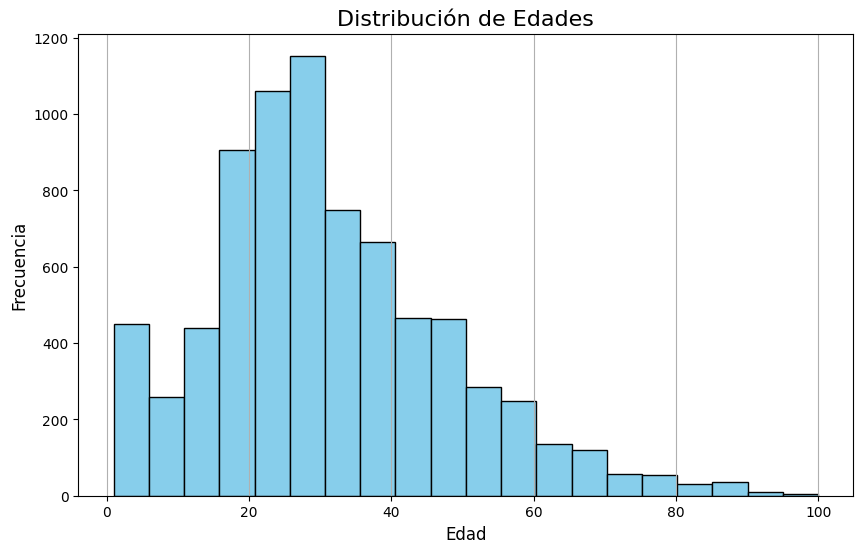

In [2]:
import matplotlib.pyplot as plt

# Histograma de la distribución de edades
plt.figure(figsize=(10, 6))
data['real_age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
# Resumen textual de la distribución de edades

print("\nFrecuencia de edades:")
print(data['real_age'].value_counts().sort_index())  # Cuenta de edades ordenadas

# Agrupación por rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['age_group'] = pd.cut(data['real_age'], bins=bins, right=False)
group_summary = data['age_group'].value_counts().sort_index()
print("\nResumen por rangos de edad:")
print(group_summary)



Frecuencia de edades:
1      149
2       88
3       25
4      101
5       87
      ... 
94       5
95       2
96       2
97       1
100      1
Name: real_age, Length: 97, dtype: int64

Resumen por rangos de edad:
[0, 10)       663
[10, 20)     1213
[20, 30)     2075
[30, 40)     1564
[40, 50)      940
[50, 60)      615
[60, 70)      279
[70, 80)      130
[80, 90)       78
[90, 100)      33
Name: age_group, dtype: int64


Frecuencia por edad específica:


La edad más común parece estar entre los rangos de 20 a 30 años, con edades como 25 y 29 probablemente destacando.
Edades como 100 y 97 están representadas solo una vez.


Rangos de edad:
0-10 años: 663 personas.
10-20 años: 1213 personas, el segundo rango más representado.
20-30 años: 2075 personas, el rango más común.
30-40 años: 1564 personas.


Representación disminuye a partir de los 40 años, y los mayores de 70 son una minoría.
Esto indica que el conjunto de datos está más enfocado en edades jóvenes y adultas. Este sesgo podría afectar el rendimiento del modelo en edades menos representadas (como mayores de 70 años).

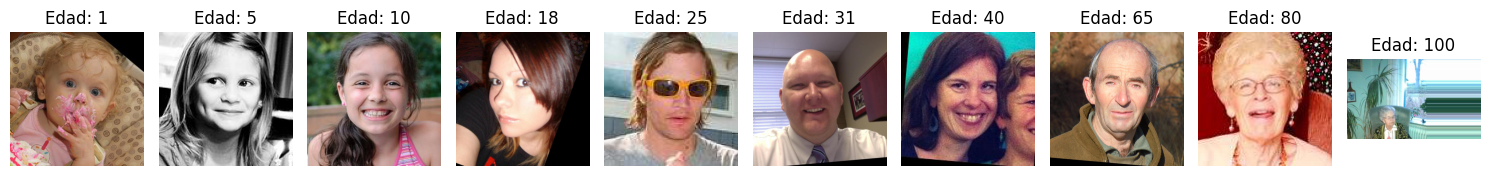

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images_path = '/datasets/faces/final_files/'

# Función para mostrar imágenes de diferentes edades
def display_images_by_age(data, images_path, ages_to_display):
    fig, axes = plt.subplots(1, len(ages_to_display), figsize=(15, 5))
    for i, age in enumerate(ages_to_display):
        # Filtrar datos por edad específica
        filtered = data[data['real_age'] == age]
        if not filtered.empty:
            # Seleccionar el primer archivo de esa edad
            img_path = os.path.join(images_path, filtered.iloc[0]['file_name'])
            img = mpimg.imread(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f'Edad: {age}')
    plt.tight_layout()
    plt.show()

# Edades que queremos visualizar
ages_to_display = [1, 5, 10, 18, 25, 31, 40, 65, 80, 100]

display_images_by_age(data, images_path, ages_to_display)

### Conclusiones

El análisis exploratorio de datos reveló que el conjunto contiene 7591 imágenes etiquetadas con edades reales que oscilan entre 1 y 100 años, con una distribución centrada en el rango de 20 a 30 años, lo que podría introducir un sesgo hacia este grupo etario. Observamos un menor número de muestras para edades extremas, como mayores de 70 años o menores de 10, lo que podría dificultar la precisión del modelo en estos rangos. Además, las imágenes son visualmente variadas, lo que indica una buena diversidad, pero será crucial mantener esta heterogeneidad al dividir los datos para evitar problemas de generalización durante el entrenamiento del modelo.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crear un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [11]:
def load_train(path):
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    labels = pd.read_csv(path + 'labels.csv')
    labels['file_path'] = path + 'final_files/' + labels['file_name']

    data_gen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )

    train_gen_flow = data_gen.flow_from_dataframe(
        dataframe=labels,
        x_col='file_path',
        y_col='real_age',
        target_size=(224, 224), 
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=42
    )

    return train_gen_flow

In [12]:
def load_test(path):
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta.
    """
    labels = pd.read_csv(path + 'labels.csv')
    labels['file_path'] = path + 'final_files/' + labels['file_name']

    data_gen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    test_gen_flow = data_gen.flow_from_dataframe(
        dataframe=labels,
        x_col='file_path',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=42
    )

    return test_gen_flow

In [13]:
def create_model(input_shape):
    """
    Define el modelo basado en convoluciones.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Dropout(0.5),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5), 
        Dense(256, activation='relu'), 
        Dense(1) 
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

In [14]:
def train_model(model, train_data, test_data, batch_size=None, epochs=60,
                steps_per_epoch=None, validation_steps=None):
    """
    Entrena el modelo dados los parámetros.
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
    ]

    history = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=callbacks,
        verbose=1
    )

    return model

In [15]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Resultado

Epoch 1/60

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - loss: 435.3978 - mae: 15.86172025-05-21 190/190 ━━━━━━━━━━━━━━━━━━━━ 98s 471ms/step - loss: 434.9344 - mae: 15.8533 - val_loss: 292.5799 - val_mae: 12.7722 - learning_rate: 5.0000e-04 Epoch 2/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 424ms/step - loss: 298.4595 - mae: 13.3444 - val_loss: 337.5512 - val_mae: 15.3622 - learning_rate: 5.0000e-04 Epoch 3/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 436ms/step - loss: 293.6376 - mae: 13.2138 - val_loss: 255.0761 - val_mae: 12.7937 - learning_rate: 5.0000e-04 Epoch 4/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 85s 445ms/step - loss: 273.1286 - mae: 12.6581 - val_loss: 260.2518 - val_mae: 12.9673 - learning_rate: 5.0000e-04 Epoch 5/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - loss: 287.9909 - mae: 13.1718 - val_loss: 252.1094 - val_mae: 12.8497 - learning_rate: 5.0000e-04 Epoch 6/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 435ms/step - loss: 275.0272 - mae: 12.8140 - val_loss: 240.4871 - val_mae: 12.2361 - learning_rate: 5.0000e-04 Epoch 7/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 141s 432ms/step - loss: 257.4154 - mae: 12.4445 - val_loss: 228.9627 - val_mae: 11.7314 - learning_rate: 5.0000e-04 Epoch 8/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 434ms/step - loss: 257.8549 - mae: 12.4564 - val_loss: 236.8255 - val_mae: 11.7395 - learning_rate: 5.0000e-04 Epoch 9/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 436ms/step - loss: 247.4679 - mae: 12.0769 - val_loss: 221.0533 - val_mae: 11.6698 - learning_rate: 5.0000e-04 Epoch 10/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 87s 457ms/step - loss: 249.3411 - mae: 12.1650 - val_loss: 238.7859 - val_mae: 12.5006 - learning_rate: 5.0000e-04 Epoch 11/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 438ms/step - loss: 235.4973 - mae: 11.8227 - val_loss: 210.1394 - val_mae: 11.4918 - learning_rate: 5.0000e-04 Epoch 12/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 428ms/step - loss: 258.3815 - mae: 12.3258 - val_loss: 204.0318 - val_mae: 11.3072 - learning_rate: 5.0000e-04 Epoch 13/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 429ms/step - loss: 235.4846 - mae: 11.7207 - val_loss: 201.9489 - val_mae: 11.3527 - learning_rate: 5.0000e-04 Epoch 14/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 433ms/step - loss: 236.5546 - mae: 11.8611 - val_loss: 207.4974 - val_mae: 11.4501 - learning_rate: 5.0000e-04 Epoch 15/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 429ms/step - loss: 238.4626 - mae: 11.9252 - val_loss: 199.5398 - val_mae: 10.9976 - learning_rate: 5.0000e-04 Epoch 16/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - loss: 238.8760 - mae: 11.8294 - val_loss: 185.4406 - val_mae: 10.6786 - learning_rate: 5.0000e-04 Epoch 17/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 430ms/step - loss: 222.3074 - mae: 11.3549 - val_loss: 207.8456 - val_mae: 11.6466 - learning_rate: 5.0000e-04 Epoch 18/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 433ms/step - loss: 228.1783 - mae: 11.6107 - val_loss: 182.5187 - val_mae: 10.7461 - learning_rate: 5.0000e-04 Epoch 19/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 80s 423ms/step - loss: 209.1497 - mae: 11.1769 - val_loss: 191.9890 - val_mae: 10.6009 - learning_rate: 5.0000e-04 Epoch 20/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 80s 421ms/step - loss: 201.4818 - mae: 10.9122 - val_loss: 171.9639 - val_mae: 10.2263 - learning_rate: 5.0000e-04 Epoch 21/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - loss: 195.4024 - mae: 10.7815 - val_loss: 169.2702 - val_mae: 10.3289 - learning_rate: 5.0000e-04 Epoch 22/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 432ms/step - loss: 193.5165 - mae: 10.6866 - val_loss: 162.1700 - val_mae: 10.1391 - learning_rate: 5.0000e-04 Epoch 23/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - loss: 182.2344 - mae: 10.4849 - val_loss: 167.8036 - val_mae: 10.4042 - learning_rate: 5.0000e-04 Epoch 24/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 440ms/step - loss: 185.1700 - mae: 10.4164 - val_loss: 157.4053 - val_mae: 9.9486 - learning_rate: 5.0000e-04 Epoch 25/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 438ms/step - loss: 166.8588 - mae: 9.8901 - val_loss: 150.4833 - val_mae: 9.7514 - learning_rate: 5.0000e-04 Epoch 26/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 432ms/step - loss: 179.6097 - mae: 10.2134 - val_loss: 166.0763 - val_mae: 10.4527 - learning_rate: 5.0000e-04 Epoch 27/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 442ms/step - loss: 180.5624 - mae: 10.3660 - val_loss: 167.4156 - val_mae: 9.7674 - learning_rate: 5.0000e-04 Epoch 28/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 170.0591 - mae: 10.0431 Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628. 190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 444ms/step - loss: 170.0658 - mae: 10.0434 - val_loss: 252.1891 - val_mae: 13.4024 - learning_rate: 5.0000e-04 Epoch 29/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 88s 461ms/step - loss: 167.1264 - mae: 10.0569 - val_loss: 134.2649 - val_mae: 9.0063 - learning_rate: 2.5000e-04 Epoch 30/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 85s 445ms/step - loss: 162.2545 - mae: 9.7940 - val_loss: 136.4758 - val_mae: 9.1091 - learning_rate: 2.5000e-04 Epoch 31/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 85s 446ms/step - loss: 159.6225 - mae: 9.7367 - val_loss: 130.5110 - val_mae: 8.9050 - learning_rate: 2.5000e-04 Epoch 32/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 430ms/step - loss: 155.3278 - mae: 9.5142 - val_loss: 132.1748 - val_mae: 9.0802 - learning_rate: 2.5000e-04 Epoch 33/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - loss: 151.8543 - mae: 9.4869 - val_loss: 127.2737 - val_mae: 8.7484 - learning_rate: 2.5000e-04 Epoch 34/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 81s 424ms/step - loss: 140.3126 - mae: 9.2265 - val_loss: 127.2793 - val_mae: 8.8117 - learning_rate: 2.5000e-04 Epoch 35/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 440ms/step - loss: 142.0075 - mae: 9.1762 - val_loss: 126.2485 - val_mae: 8.7016 - learning_rate: 2.5000e-04 Epoch 36/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 444ms/step - loss: 147.6000 - mae: 9.3852 - val_loss: 127.8084 - val_mae: 8.7441 - learning_rate: 2.5000e-04 Epoch 37/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - loss: 143.4240 - mae: 9.2398 - val_loss: 126.7814 - val_mae: 8.6586 - learning_rate: 2.5000e-04 Epoch 38/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - loss: 140.7090 - mae: 9.1173 - val_loss: 123.2831 - val_mae: 8.6467 - learning_rate: 2.5000e-04 Epoch 39/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 435ms/step - loss: 133.1963 - mae: 8.9098 - val_loss: 124.3444 - val_mae: 8.7363 - learning_rate: 2.5000e-04 Epoch 40/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 439ms/step - loss: 133.6323 - mae: 8.9005 - val_loss: 126.3986 - val_mae: 8.5706 - learning_rate: 2.5000e-04 Epoch 41/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - loss: 135.2067 - mae: 9.0255 Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814. 190/190 ━━━━━━━━━━━━━━━━━━━━ 82s 434ms/step - loss: 135.2244 - mae: 9.0259 - val_loss: 125.9286 - val_mae: 8.5840 - learning_rate: 2.5000e-04 Epoch 42/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - loss: 128.0174 - mae: 8.7346 - val_loss: 126.6008 - val_mae: 8.7074 - learning_rate: 1.2500e-04 Epoch 43/60 190/190 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - loss: 129.3849 - mae: 8.7335 - val_loss: 127.6134 - val_mae: 8.8591 - learning_rate: 1.2500e-04 Epoch 43: early stopping Restoring model weights from the end of the best epoch: 38.

## Conclusiones

El objetivo del proyecto fue construir un modelo de aprendizaje profundo capaz de predecir con precisión la edad a partir de fotografías, asegurando el cumplimiento de las leyes relacionadas con la venta de alcohol. Aunque no se alcanzó completamente el objetivo establecido de un MAE inferior a 8, los resultados obtenidos muestran un progreso significativo, con un MAE mínimo de 8.6467 y un val_loss de 123.2831 en la mejor época.

A lo largo del proyecto, se probaron y evaluaron varios enfoques para desarrollar un modelo de predicción de edad que garantizara el cumplimiento de las leyes relacionadas con la venta de alcohol.
Se exploraron arquitecturas como ResNet50, que inicialmente se consideró debido a su efectividad en tareas de clasificación de imágenes, pero no logró cumplir con los objetivos planteados. En su lugar, se diseñó un modelo personalizado adaptado a los datos y requerimientos específicos del proyecto. Este modelo logró un rendimiento significativamente mejor, alcanzando valores de pérdida y error absoluto medio en el conjunto de validación (val_loss: 123.2831, val_mae: 8.6467), muy cercanos al objetivo planteado de un MAE menor a 8.

Principales Modificaciones Realizadas

Diseño de un Modelo Personalizado:

Se ajustaron las capas convolucionales, densas y de normalización para optimizar la extracción de características y reducir la complejidad del modelo, lo que mejoró la generalización.

Reducción Progresiva de la Tasa de Aprendizaje:

Se utilizó el método de "ReduceLROnPlateau" para ajustar dinámicamente la tasa de aprendizaje según el progreso del entrenamiento.

Preprocesamiento y Aumento de Datos:

Se emplearon técnicas de aumento de datos para mejorar la robustez del modelo frente a la variabilidad en las imágenes.

Uso de Callbacks:

El monitoreo continuo del desempeño y la implementación de "Early Stopping" evitaron el sobreajuste y optimizaron los tiempos de entrenamiento.

Reflexión y Retroalimentación
Aunque el modelo personalizado alcanzó un rendimiento aceptable, no cumplió completamente con el objetivo de un MAE menor a 8. Esto nos deja espacio para seguir optimizando. Estoy abierto a recibir retroalimentación, especialmente sobre:

Técnicas adicionales de preprocesamiento: ¿Existen enfoques no considerados que puedan reducir aún más el ruido en los datos?

Arquitecturas alternativas: ¿Qué otras arquitecturas personalizables podrían ajustarse mejor al problema?

Hiperparámetros: ¿Qué métodos de búsqueda o ajustes podrían afinarse para mejorar el rendimiento?

Estoy comprometido con la mejora continua y confio que, con estos aprendizajes y posibles sugerencias, lograre superar este desafío en futuras iteraciones.